### Exploratory analysis of the book of Hebrews
- purpose: primarily for NLP exploration
- method: scrape the book of hebrews from the web

In [364]:
import warnings
warnings.filterwarnings('ignore')

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [287]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.decomposition import NMF

In [288]:
import glob
import os
from collections import defaultdict
import re
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd

In [289]:
import nltk
import os
import spacy
import re
import string
import pickle
from itertools import cycle
import matplotlib.pyplot as plt
from nltk import stem
%matplotlib inline
%config InlineBackend.figure_formats = ['retina']
from nltk.tokenize import word_tokenize, sent_tokenize, MWETokenizer
from gensim import corpora, models, similarities, matutils
from sklearn.decomposition import TruncatedSVD, NMF
from corextopic import corextopic, vis_topic
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.manifold import TSNE
import plotly.graph_objects as go

In [2]:
import requests

url = 'https://www.esv.org/robots.txt'
response  = requests.get(url)
print(response.text)


User-agent: *
Disallow: /media/
Disallow: /static/
Disallow: /account/
Disallow: /search/*?*
Allow: /



In [3]:
test = requests.get("https://www.esv.org")
print(test)

<Response [200]>


In [41]:
import numpy as np
import pandas as pd

import requests
from bs4 import BeautifulSoup

## allows us to use reg expressions to search fields
import re

from selenium import webdriver
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By

from selenium.webdriver.support import expected_conditions as EC

import random
import time
import csv
import os

chromedriver = "/Applications/chromedriver" # path to the chromedriver executable
os.environ["webdriver.chrome.driver"] = chromedriver

# user agent
from selenium.webdriver.chrome.options import Options
from fake_useragent import UserAgent

options = Options()
ua = UserAgent()
userAgent = ua.random
print(userAgent)
options.add_argument(f'user-agent={userAgent}')

#driver = webdriver.Chrome(chrome_options=options)


Mozilla/5.0 (Windows NT 6.2; WOW64) AppleWebKit/537.36 (KHTML like Gecko) Chrome/46.0.2486.0 Safari/537.36 Edge/13.9200


### II. Selenium to scrape album contents

In [26]:
driver = webdriver.Chrome(chromedriver,chrome_options=options)

# update the page here to start where left off. Page is essentially the count as well
pagestart=1
pageend=2

#_url = "https://www.discogs.com/sell/list?sort=price%2Cdesc&limit=100&year1=1900&year2=1970&format=Vinyl&price=over40&genre=Jazz&currency=USD&style=Hard+Bop&page="
# not just bebop
_url = "https://www.esv.org/Hebrews+"
url= _url + str(pagestart) + "/"

# starting url
#driver.get("https://www.discogs.com/sell/list?sort=price%2Cdesc&limit=100&year1=1900&year2=1970&format=Vinyl&price=over40&genre=Jazz&currency=USD&style=Hard+Bop&page=3#more%3Dyear")
driver.get(url)


with open('hebrewstext.csv', 'w',newline='') as csvfile:
    file = csv.writer(csvfile)
    # make headers
    file.writerow(['page_title','page_body','page_head'])
    count = pagestart #3

    # Make a request
    page = requests.get(url)
    soup = BeautifulSoup(page.content, 'html.parser')

    first_h1 = soup.select('section')[2].text
#     print(first_h1)
    
#     for elem in first_h1:
#         title = elem.select('u')[0].text
#         review_label = elem.select('div.ratings')[0].text
#         info = {
#             "title": title.strip(),
#             "review": review_label.strip()
#         }
#         top_items.append(info)

#     print(top_items)
    
    all_h1_tags=[]
    for element in soup.select('u'):
        all_h1_tags.append(element.text)

    # Create seventh_p_text and set it to 7th p element text of the page
#     seventh_p_text = soup.select('p')[6].text

    print(all_h1_tags)
        
    # Extract title of page
#     page_title = soup.title.text

#     # Extract body of page
#     page_body = soup.body

#     # Extract head of page
#     page_head = soup.head

#     # print the result
#     print(page_body, page_head)
    
#     observation = [page_title,page_body,page_head]
#     file.writerow(observation)

#     time.sleep(.5+2*random.random())
            
        # go to next page in the marketplace
        
#     nextpage = "https://www.esv.org/Hebrews+" + str(count+1)

#     driver.get(nextpage)
        
#     count = count + 1

<ipython-input-26-9d92fa4564d5>:1: DeprecationWarning: use options instead of chrome_options
  driver = webdriver.Chrome(chromedriver,chrome_options=options)


['Remind', ' ', 'them', ' ', 'to', ' ', 'be', ' ', 'submissive', ' ', 'to', ' ', 'rulers', ' ', 'and', ' ', 'authorities', ',', ' ', 'to', ' ', 'be', ' ', 'obedient', ',', ' ', 'to', ' ', 'be', ' ', 'ready', ' ', 'for', ' ', 'every', ' ', 'good', ' ', 'work', ',', ' ', 'to', ' ', 'speak', ' ', 'evil', ' ', 'of', ' ', 'no', ' ', 'one', ',', ' ', 'to', ' ', 'avoid', ' ', 'quarreling', ',', ' ', 'to', ' ', 'be', ' ', 'gentle', ',', ' ', 'and', ' ', 'to', ' ', 'show', ' ', 'perfect', ' ', 'courtesy', ' ', 'toward', ' ', 'all', ' ', 'people', '.', ' ', 'For', ' ', 'we', ' ', 'ourselves', ' ', 'were', ' ', 'once', ' ', 'foolish', ',', ' ', 'disobedient', ',', ' ', 'led', ' ', 'astray', ',', ' ', 'slaves', ' ', 'to', ' ', 'various', ' ', 'passions', ' ', 'and', ' ', 'pleasures', ',', ' ', 'passing', ' ', 'our', ' ', 'days', ' ', 'in', ' ', 'malice', ' ', 'and', ' ', 'envy', ',', ' ', 'hated', ' ', 'by', ' ', 'others', ' ', 'and', ' ', 'hating', ' ', 'one', ' ', 'another', '.', ' ', 'But', ' '

### Different method for obtaining books
- https://github.com/Jamiil92/Bible/blob/master/text/scrape_text.ipynb

In [42]:
import os, requests, re, time
from bs4 import BeautifulSoup
from tqdm.notebook import tqdm
tqdm.pandas()

In [43]:
root_url = 'https://live.bible.is'

In [185]:
#New Testament
#fr ref  : 1910 Louis Segond (Tresorsonore recording)
#eng ref : King James version 

#change this to the language you want
#language = ['/bible/ENGKJV', '/bible/FRNTLS']
language =['/bible/EN1ESV']

In [186]:
os.chdir('/Users/chrischan/Documents/02_Class/Metis/bootcamp/githubrepo/bib_hbrws')

In [187]:
# New testament books

book = ['HEB']

#Old + New testament books

# book = ['MAT', 'MRK', 'LUK', 'JHN', 'ACT', 'ROM', '1CO', '2CO', 'GAL', 'EPH', 'PHP', 'COL',
#         '1TH', '2TH', '1TI', '2TI', 'TIT', 'PHM', 'HEB', 'JAS', '1PE', '2PE', '1JN', '2JN',
#         '3JN', 'JUD', 'REV']


'''
book = ["GEN", "EXO", "LEV", "NUM", "DEU", "JOS", "JDG", "RUT", "1SA", "2SA", "1KI", "2KI",
        "1CH", "2CH", "EZR", "NEH", "EST", "JOB", "PSA", "PRO", "ECC", "SNG", "ISA", "JER",
        "LAM", "EZK", "DAN", "HOS", "JOL", "AMO", "OBA", "JON", "MIC", "NAM", "HAB", "ZEP",
        "HAG", "ZEC", "MAL",'MAT', 'MRK', 'LUK', 'JHN', 'ACT', 'ROM', '1CO', '2CO', 'GAL',
        'EPH', 'PHP', 'COL','1TH', '2TH', '1TI', '2TI', 'TIT', 'PHM', 'HEB', 'JAS', '1PE',
        '2PE', '1JN', '2JN','3JN', 'JUD', 'REV']
'''

# create a new directory
try:
    os.mkdir(f"{os.curdir}"+"/text_Data/")
except FileExistsError:
    pass
# set the new directory as the current directory
os.chdir(f"{os.curdir}"+"/text_Data/")

cur_w_d = os.getcwd()

# if you run the cell below, go and check the output at this path


In [188]:
cur_w_d

'/Users/chrischan/Documents/02_Class/Metis/bootcamp/githubrepo/bib_hbrws/text_Data'

In [189]:

%%time
lines = []
for i in tqdm(range(len(language)), desc='lang'):
    try:
        create_lang_dir = cur_w_d+"/"+ language[i].split('/')[-1] +"/"
        os.mkdir(create_lang_dir)
    except FileExistsError:
        pass
    for j in tqdm(range(len(book)), desc='book'):
        urls = []
        url = root_url + language[i] + "/" + book[j] + "/"
        urls.append(url)
        try:
            create_book_dir = cur_w_d+"/"+language[i].split('/')[-1] +"/"+ book[j]+"/" 
            os.mkdir(create_book_dir)
        except FileExistsError:
            pass
        
        #book_of_nt = []
        for url_item in urls:
            for k in tqdm(range(1,30), desc='chapter'): # Set the max number of chapter per book to 30 
                page = url_item + str(k)
                #print(page)
                response = requests.get(page)
                if response.url == page :
                    #print(response) # display 200 meaning that we successfully access the link
                    soup = BeautifulSoup(response.content, "html.parser")
                    verses = soup.find_all("span", {"class": ""})
                    verses_of_nt = [verse.text for verse in verses]
                    verses_of_nt_prep = verses_of_nt[:-15] # a little preprocessing step
                    #book_of_nt.append(verses_of_nt_prep)
                    
                    create_chapter_file_name = cur_w_d+"/"+language[i].split('/')[-1] +"/"+ book[j]+"/"+book[j]+"_chap_"+str(k)

                    with open(create_chapter_file_name+'.txt', 'a') as file: # specified the name of the file

                        for verse_no, line in enumerate(iterable=verses_of_nt_prep, start=1):
                            file.write("( "+book[j]+" "+str(k)+":" +str(verse_no)+" ) ")
#                             file.write("( "+book[j]+" "+str(k)+") ")
                            if line !="-":
                                file.write(line)
                                lines.append(line) # for further preprocessing steps
                            else:
                                file.write("Interlude")
                                lines.append("Interlude") #for further preprocessing steps
                            file.write('\n')

                            
                else :
                    #print("<Response [404]>") # Because links don't overflow we instead get back to square 1
                    break
    print("1 minute break \n",30*"=")
    time.sleep(5)
print("DONE")



1 minute break 

DONE
CPU times: user 689 ms, sys: 122 ms, total: 811 ms
Wall time: 17 s


### Read in txt files

In [203]:
import pandas as pd
import glob

path = r'/Users/chrischan/Documents/02_Class/Metis/bootcamp/githubrepo/bib_hbrws/text_Data/EN1ESV/HEB' # use your path
all_files = glob.glob(path + "/*.txt")

li = []

for filename in all_files:
    idf = pd.read_csv(filename, index_col=None, header=None, sep='\n')
    li.append(idf)

df = pd.concat(li, axis=0, ignore_index=True)

In [204]:
df

,0
0,( HEB 11:1 ) Now faith is the assurance of thi...
1,( HEB 11:2 ) For by it the people of old recei...
2,( HEB 11:3 ) By faith we understand that the u...
3,( HEB 11:4 ) By faith Abel offered to God a mo...
4,( HEB 11:5 ) By faith Enoch was taken up so th...
...,...
298,( HEB 2:14 ) Since therefore the children shar...
299,( HEB 2:15 ) and deliver all those who through...
300,( HEB 2:16 ) For surely it is not angels that ...
301,( HEB 2:17 ) Therefore he had to be made like ...


**Create separate fields for book, chapter and verse**

In [252]:
df.columns = ['text']
df

,text
0,( HEB 11:1 ) Now faith is the assurance of thi...
1,( HEB 11:2 ) For by it the people of old recei...
2,( HEB 11:3 ) By faith we understand that the u...
3,( HEB 11:4 ) By faith Abel offered to God a mo...
4,( HEB 11:5 ) By faith Enoch was taken up so th...
...,...
298,( HEB 2:14 ) Since therefore the children shar...
299,( HEB 2:15 ) and deliver all those who through...
300,( HEB 2:16 ) For surely it is not angels that ...
301,( HEB 2:17 ) Therefore he had to be made like ...


In [279]:
df2=df.copy()

In [280]:
# create var with references
df2['refs']=df['text'].apply(lambda st: st[st.find("(")+1:st.find(")")])

# split book, chap, verse, remove from text

# book: (there's a space before the book name)
df2['book']=df2['refs'].str.split(" ").str[1]

# chapter: between space and :
df2['chap']=df2['refs'].apply(lambda x: x[x.find(" ")+4:x.find(":")])

# verse: after :
df2['verse']=df2['refs'].str.split(":").str[1]

# replace refs special char with V and remove all spaces
df2['refs2']=df2['refs'].str.replace(':','V')
df2['refsclean']=df2['refs2'].str.replace(' ','')

# remove refs from verses
df2['textclean']=df2['text'].str.replace(r"\(.*\)","")

#drop unnecessary cols
df2.drop(columns=['refs','refs2','text'],inplace=True)
df2

,book,chap,verse,refsclean,textclean
0,HEB,11,1,HEB11V1,Now faith is the assurance of things hoped fo...
1,HEB,11,2,HEB11V2,For by it the people of old received their co...
2,HEB,11,3,HEB11V3,By faith we understand that the universe was ...
3,HEB,11,4,HEB11V4,By faith Abel offered to God a more acceptabl...
4,HEB,11,5,HEB11V5,By faith Enoch was taken up so that he should...
...,...,...,...,...,...
298,HEB,2,14,HEB2V14,Since therefore the children share in flesh a...
299,HEB,2,15,HEB2V15,and deliver all those who through fear of dea...
300,HEB,2,16,HEB2V16,"For surely it is not angels that he helps, bu..."
301,HEB,2,17,HEB2V17,Therefore he had to be made like his brothers...


### Data Cleaning

In [283]:
import string
breaks = lambda x: re.sub("\n", " ", x)
alphanumeric = lambda x: re.sub("\w*\d\w*", "", x)
punc_lower = lambda x: re.sub("[%s]" % re.escape(string.punctuation), "", x.lower())

In [284]:
df2["textmod"] = df2["textclean"].map(breaks).map(alphanumeric).map(punc_lower)
df2

,book,chap,verse,refsclean,textclean,textmod
0,HEB,11,1,HEB11V1,Now faith is the assurance of things hoped fo...,now faith is the assurance of things hoped fo...
1,HEB,11,2,HEB11V2,For by it the people of old received their co...,for by it the people of old received their co...
2,HEB,11,3,HEB11V3,By faith we understand that the universe was ...,by faith we understand that the universe was ...
3,HEB,11,4,HEB11V4,By faith Abel offered to God a more acceptabl...,by faith abel offered to god a more acceptabl...
4,HEB,11,5,HEB11V5,By faith Enoch was taken up so that he should...,by faith enoch was taken up so that he should...
...,...,...,...,...,...,...
298,HEB,2,14,HEB2V14,Since therefore the children share in flesh a...,since therefore the children share in flesh a...
299,HEB,2,15,HEB2V15,and deliver all those who through fear of dea...,and deliver all those who through fear of dea...
300,HEB,2,16,HEB2V16,"For surely it is not angels that he helps, bu...",for surely it is not angels that he helps but...
301,HEB,2,17,HEB2V17,Therefore he had to be made like his brothers...,therefore he had to be made like his brothers...


### Lemmatize

In [291]:
nlp = spacy.load("en_core_web_sm", disable=["parser", "ner"])
spacy_lemmatize = lambda x: " ".join([token.lemma_ for token in nlp(x)])

In [292]:
df2["lemmatized"] = df2["textmod"].apply(spacy_lemmatize)
df2

,book,chap,verse,refsclean,textclean,textmod,lemmatized
0,HEB,11,1,HEB11V1,Now faith is the assurance of things hoped fo...,now faith is the assurance of things hoped fo...,now faith be the assurance of thing hope for...
1,HEB,11,2,HEB11V2,For by it the people of old received their co...,for by it the people of old received their co...,for by it the people of old receive their co...
2,HEB,11,3,HEB11V3,By faith we understand that the universe was ...,by faith we understand that the universe was ...,by faith we understand that the universe be ...
3,HEB,11,4,HEB11V4,By faith Abel offered to God a more acceptabl...,by faith abel offered to god a more acceptabl...,by faith abel offer to god a more acceptable...
4,HEB,11,5,HEB11V5,By faith Enoch was taken up so that he should...,by faith enoch was taken up so that he should...,by faith enoch be take up so that he should ...
...,...,...,...,...,...,...,...
298,HEB,2,14,HEB2V14,Since therefore the children share in flesh a...,since therefore the children share in flesh a...,since therefore the child share in flesh and...
299,HEB,2,15,HEB2V15,and deliver all those who through fear of dea...,and deliver all those who through fear of dea...,and deliver all those who through fear of de...
300,HEB,2,16,HEB2V16,"For surely it is not angels that he helps, bu...",for surely it is not angels that he helps but...,for surely it be not angel that he help but ...
301,HEB,2,17,HEB2V17,Therefore he had to be made like his brothers...,therefore he had to be made like his brothers...,therefore he have to be make like his brothe...


### Chapter level df

In [365]:
df3 = df2.copy()

In [366]:
df3['textchap'] = df2[['book','chap','lemmatized']].groupby(['book','chap'])['lemmatized'].transform(lambda x: ','.join(x))
df_chaps=df3[['book','chap','textchap']].drop_duplicates()

In [368]:
df_chaps.head()

,book,chap,textchap
0,HEB,11,now faith be the assurance of thing hope for...
40,HEB,9,now even the first covenant have regulation ...
68,HEB,8,now the point in what we be say be this we h...
81,HEB,10,for since the law have but a shadow of the g...
120,HEB,12,therefore since we be surround by so great a...


**Stop words**

In [309]:
from sklearn.feature_extraction import text 
my_stop_words = nltk.corpus.stopwords.words('english')

In [382]:
stopadd=['seen', 'went', 'would', 'even', 'since', 'us', 'come', 'away', 'said', 'let', 'also', 'made',
         'things', 'may', 'shall', 'might', 'everything', 'sure', 'make', 'know','one','say']
my_stop_words.extend(stopadd)


### Word Cloud

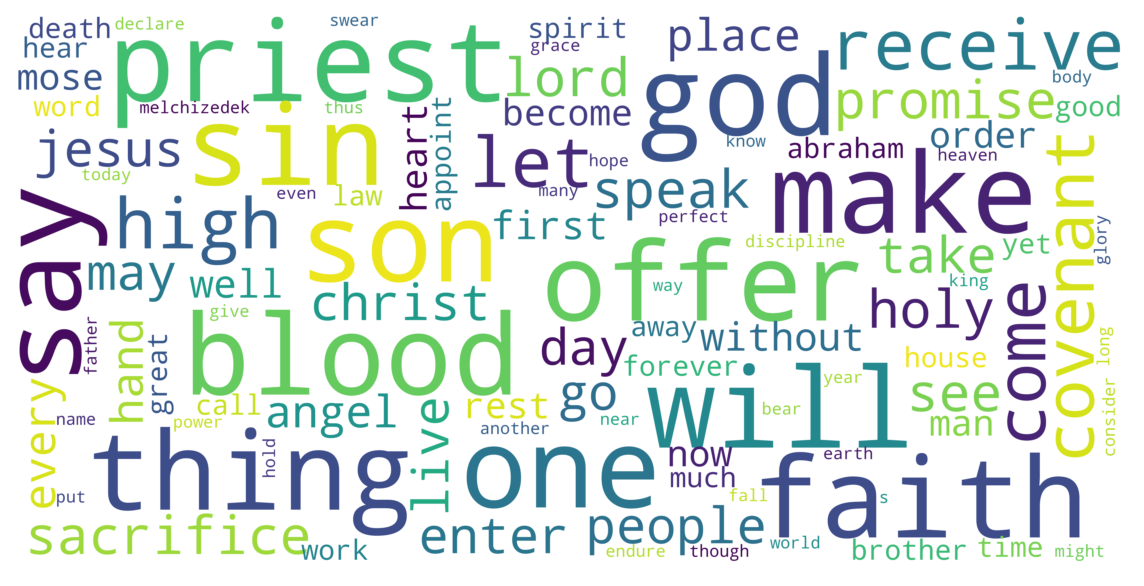

<Figure size 432x288 with 0 Axes>

In [383]:
# Visualise using word cloud
from wordcloud import WordCloud
import matplotlib as plt
import matplotlib.pyplot as plt
%matplotlib inline

# remove stopwords 

#def wcloud(data):
df_cloud = df3.copy()

df_cloud['textchap']=df3['lemmatized'].apply(lambda x: ' '.join([item for item in x.split() if item not in my_stop_words]))

split_title = [x.split(" ") for x in df_cloud['lemmatized'].astype(str)]

big_list = []

for x in split_title:
    big_list.extend(x)

listCounts = pd.Series(big_list).value_counts()

wordcloud = WordCloud(background_color='white', max_words=100, max_font_size=40, scale=20,
        random_state=1).generate((listCounts[listCounts > 2]).to_string())

plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
plt.tight_layout()
#plt.savefig('cloud_costanza.pdf')
wordcloud.to_file('cloud_hebrews.png')
plt.show()

### Topic Modeling

**doc to word**

In [384]:
def lsa(doc_word, feature_names, num_topics):
    model = TruncatedSVD(num_topics)
    doc_topic = model.fit_transform(doc_word)
    for ix, topic in enumerate(model.components_):
        print("\nTopic ", ix)
        print(", ".join([feature_names[i] for i in topic.argsort()[:-21:-1]]))

def nmf(doc_word, feature_names, num_topics):
    model = NMF(num_topics)
    doc_topic = model.fit_transform(doc_word)
    for ix, topic in enumerate(model.components_):
        print("\nTopic ", ix)
        print(", ".join([feature_names[i] for i in topic.argsort()[:-25:-1]]))

def lda(doc_word, feature_names, id2word, num_topics):
    corpus = matutils.Sparse2Corpus(doc_word.transpose())
    model = models.LdaModel(corpus=corpus, num_topics=num_topics, id2word=id2word, passes=5, random_state=42)
    topics = model.print_topics(num_words=20)
    for n, topic in topics:
        print("\nTopic ", n)
        print(topic)
        

def corex(doc_word, feature_names, num_topics):
    words = list(np.asarray(feature_names))
    model = corextopic.Corex(n_hidden=num_topics, words=words, seed=1, max_iter=200)
    model.fit(doc_word, words=words, docs=data) # where data = df["Lemmatized"]
    topics = model.get_topics()
    for n,topic in enumerate(topics):
        topic_words,_ = zip(*topic)
        print('{}: '.format(n) + ','.join(topic_words))

**Count Vectorize**

In [385]:
def vectorize_2(data, min_df,max_df):
    vec = CountVectorizer(stop_words=my_stop_words,  min_df=min_df , max_df=max_df) #ngram_range=(1, 3)
    doc_word = vec.fit_transform(data)
    feature_names = vec.get_feature_names()
    id2word = dict((v, k) for k, v in vec.vocabulary_.items())
    
    return doc_word, feature_names, id2word

**NMF with min/max df**

In [386]:
df3_txt = df3["lemmatized"]

In [387]:
doc_word, feature_names, id2word= vectorize_2(df3_txt,.02,.95)
nmf(doc_word, feature_names, 4)


Topic  0
god, son, speak, work, rest, live, christ, take, angel, house, hand, spirit, hold, father, dead, day, word, fall, therefore, discipline, great, much, time, world

Topic  1
priest, offer, sin, high, sacrifice, every, appoint, gift, people, man, forever, melchizedek, law, order, without, year, become, son, go, thus, perfect, take, holy, christ

Topic  2
faith, thing, promise, receive, see, go, abraham, speak, yet, though, live, offer, near, draw, mose, well, call, consider, sacrifice, hope, death, way, son, good

Topic  3
blood, covenant, holy, therefore, place, enter, lord, jesus, day, first, declare, people, law, well, house, death, heart, spirit, without, much, call, brother, take, rest


**Try other models - can also see how many topics (elbow)**

**LDA with min/max df**

In [388]:
from gensim.corpora.dictionary import Dictionary

def vectorize_vis(data, min_df,max_df):
    vec = CountVectorizer(stop_words=my_stop_words, min_df=min_df, max_df=max_df) #, ngram_range=(1, 3)
    doc_word = vec.fit_transform(data)
    feature_names = vec.get_feature_names()
    id2word = dict((v, k) for k, v in vec.vocabulary_.items())
    dictionary = Dictionary([feature_names])
    
    return doc_word, feature_names, id2word, dictionary

In [389]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()

def lda_vis(doc_word, feature_names, id2word, dictionary, num_topics):
    corpus = matutils.Sparse2Corpus(doc_word.transpose())
    model = models.LdaModel(corpus=corpus, num_topics=num_topics, id2word=id2word, passes=5, random_state=42)    
    topics = model.print_topics(num_words=50)
    for n, topic in topics:
        print("\nTopic ", n)
        print(topic)

    vis_data = pyLDAvis.gensim.prepare(model, corpus, dictionary)
    return vis_data

In [390]:
doc_word, feature_names, id2word, dictionary = vectorize_vis(df3_txt, 0.02,.95)
vis_data = lda_vis(doc_word, feature_names, id2word, dictionary, 4)


Topic  0
0.078*"god" + 0.067*"faith" + 0.053*"son" + 0.048*"promise" + 0.037*"angel" + 0.037*"receive" + 0.035*"become" + 0.032*"spirit" + 0.030*"covenant" + 0.029*"without" + 0.028*"much" + 0.027*"man" + 0.026*"therefore" + 0.025*"give" + 0.023*"abraham" + 0.023*"endure" + 0.023*"hand" + 0.020*"discipline" + 0.018*"holy" + 0.018*"speak" + 0.017*"world" + 0.016*"see" + 0.016*"dead" + 0.016*"blood" + 0.016*"father" + 0.014*"consider" + 0.014*"bear" + 0.014*"fall" + 0.012*"day" + 0.011*"hear" + 0.010*"first" + 0.009*"heaven" + 0.009*"hold" + 0.009*"power" + 0.008*"great" + 0.008*"appoint" + 0.008*"perfect" + 0.007*"gift" + 0.007*"today" + 0.007*"yet" + 0.007*"lord" + 0.005*"thing" + 0.005*"law" + 0.005*"put" + 0.005*"death" + 0.004*"glory" + 0.004*"good" + 0.004*"name" + 0.004*"priest" + 0.004*"offer"

Topic  1
0.061*"enter" + 0.047*"place" + 0.046*"rest" + 0.044*"priest" + 0.043*"go" + 0.040*"holy" + 0.037*"god" + 0.035*"order" + 0.030*"another" + 0.030*"therefore" + 0.030*"melchizedek

In [391]:
pyLDAvis.display(vis_data)

### NMF Doc Topics for actual topics


**Doc_Topic Matrix**

In [392]:
def nmf_dt(doc_word, feature_names, num_topics):
    model = NMF(num_topics)
    doc_topic = model.fit_transform(doc_word)
    for ix, topic in enumerate(model.components_):
        print("\nTopic ", ix)
        print(", ".join([feature_names[i] for i in topic.argsort()[:-25:-1]]))
    return model, doc_topic

In [393]:
doc_word, feature_names, id2word, dictionary = vectorize_vis(df3_txt, 0.02,0.96)
nmf_model, doc_topic = nmf_dt(doc_word, feature_names, 4)


Topic  0
god, son, speak, work, rest, live, christ, take, angel, house, hand, spirit, hold, father, dead, day, word, fall, therefore, discipline, great, much, time, world

Topic  1
priest, offer, sin, high, sacrifice, every, appoint, gift, people, man, forever, melchizedek, law, order, without, year, become, son, go, thus, perfect, take, holy, christ

Topic  2
faith, thing, promise, receive, see, go, abraham, speak, yet, though, live, offer, near, draw, mose, well, call, consider, sacrifice, hope, death, way, son, good

Topic  3
blood, covenant, holy, therefore, place, enter, lord, jesus, day, first, declare, people, law, well, house, death, heart, spirit, without, much, call, brother, take, rest


In [394]:
doc_topic

array([[0.        , 0.        , 0.69125858, 0.        ],
       [0.        , 0.03251784, 0.09971628, 0.05191329],
       [0.26603988, 0.        , 0.50369418, 0.        ],
       ...,
       [0.01657012, 0.00408922, 0.04434123, 0.        ],
       [0.26195297, 0.60562146, 0.        , 0.08285671],
       [0.        , 0.        , 0.        , 0.        ]])

### Bring topics to DF

In [395]:
df_tops = pd.DataFrame(df3)

In [396]:
df_tops['topic']=doc_topic.argmax(axis=1)

In [397]:
df_tops.head(3)

,book,chap,verse,refsclean,textclean,textmod,lemmatized,textchap,topic
0,HEB,11,1,HEB11V1,Now faith is the assurance of things hoped fo...,now faith is the assurance of things hoped fo...,now faith be the assurance of thing hope for...,now faith be the assurance of thing hope for...,2
1,HEB,11,2,HEB11V2,For by it the people of old received their co...,for by it the people of old received their co...,for by it the people of old receive their co...,now faith be the assurance of thing hope for...,2
2,HEB,11,3,HEB11V3,By faith we understand that the universe was ...,by faith we understand that the universe was ...,by faith we understand that the universe be ...,now faith be the assurance of thing hope for...,2


In [398]:
def label_top(row):
    if row['topic'] == 0 :
        return '0: God/Discipline/Endurance'
    elif row['topic'] == 1 :
        return '1: Priesthood/Kingship'
    elif row['topic'] == 2 :
        return '2: Faith/Promise'
    elif row['topic'] == 3 :
        return '3: Blood/Covenant'    
    return 'Other'

In [399]:
df_tops.apply(lambda row: label_top(row), axis=1)

0                 2: Faith/Promise
1                 2: Faith/Promise
2                 2: Faith/Promise
3                 2: Faith/Promise
4      0: God/Discipline/Endurance
                  ...             
298              3: Blood/Covenant
299              3: Blood/Covenant
300               2: Faith/Promise
301         1: Priesthood/Kingship
302    0: God/Discipline/Endurance
Length: 303, dtype: object

In [400]:
df_tops['topic_label'] = df_tops.apply(lambda row: label_top(row), axis=1)

In [1401]:
df_tops.to_csv('hebrews_nmf_topics.csv')

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [401]:
df_tops.topic_label.value_counts()

0: God/Discipline/Endurance    87
3: Blood/Covenant              83
2: Faith/Promise               75
1: Priesthood/Kingship         58
Name: topic_label, dtype: int64

In [404]:
df_tops.columns

Index(['book', 'chap', 'verse', 'refsclean', 'textclean', 'textmod',
       'lemmatized', 'textchap', 'topic', 'topic_label'],
      dtype='object')

In [416]:
df_tops[["chap"]] = df_tops[["chap"]].apply(pd.to_numeric)

In [417]:
#drop_list = counter[counter['speaker'] == 'SEP'].index
#counter = counter.drop(drop_list)
df_tops_nmf = df_tops.copy()
df_tops_nmf = df_tops[['chap','topic_label','lemmatized']]
df_tops_nmf = df_tops_nmf.groupby(['chap','topic_label'], as_index = False).count()
# df_tops_nmf
df_tops_nmf = df_tops_nmf.sort_values('chap', ascending= True)
df_tops_nmf.columns = ['chap','topic_label','verse_count']
df_tops_nmf = df_tops_nmf.reset_index(drop = True)
df_tops_nmf.iloc[:25]


,chap,topic_label,verse_count
0,1,0: God/Discipline/Endurance,10
1,1,1: Priesthood/Kingship,1
2,1,2: Faith/Promise,1
3,1,3: Blood/Covenant,2
4,2,0: God/Discipline/Endurance,6
5,2,1: Priesthood/Kingship,2
6,2,2: Faith/Promise,4
7,2,3: Blood/Covenant,6
8,3,0: God/Discipline/Endurance,6
9,3,1: Priesthood/Kingship,3


**For viz, pivot by chapters**

In [418]:
df_wide = df_tops_nmf.pivot("chap","topic_label","verse_count")
df_wide

topic_label,0: God/Discipline/Endurance,1: Priesthood/Kingship,2: Faith/Promise,3: Blood/Covenant
chap,,,,
1,10.0,1.0,1.0,2.0
2,6.0,2.0,4.0,6.0
3,6.0,3.0,2.0,8.0
4,5.0,2.0,3.0,6.0
5,4.0,6.0,2.0,2.0
6,9.0,1.0,6.0,4.0
7,5.0,14.0,6.0,3.0
8,1.0,4.0,NaN,8.0
9,3.0,8.0,2.0,15.0


**Topics by Chapter**

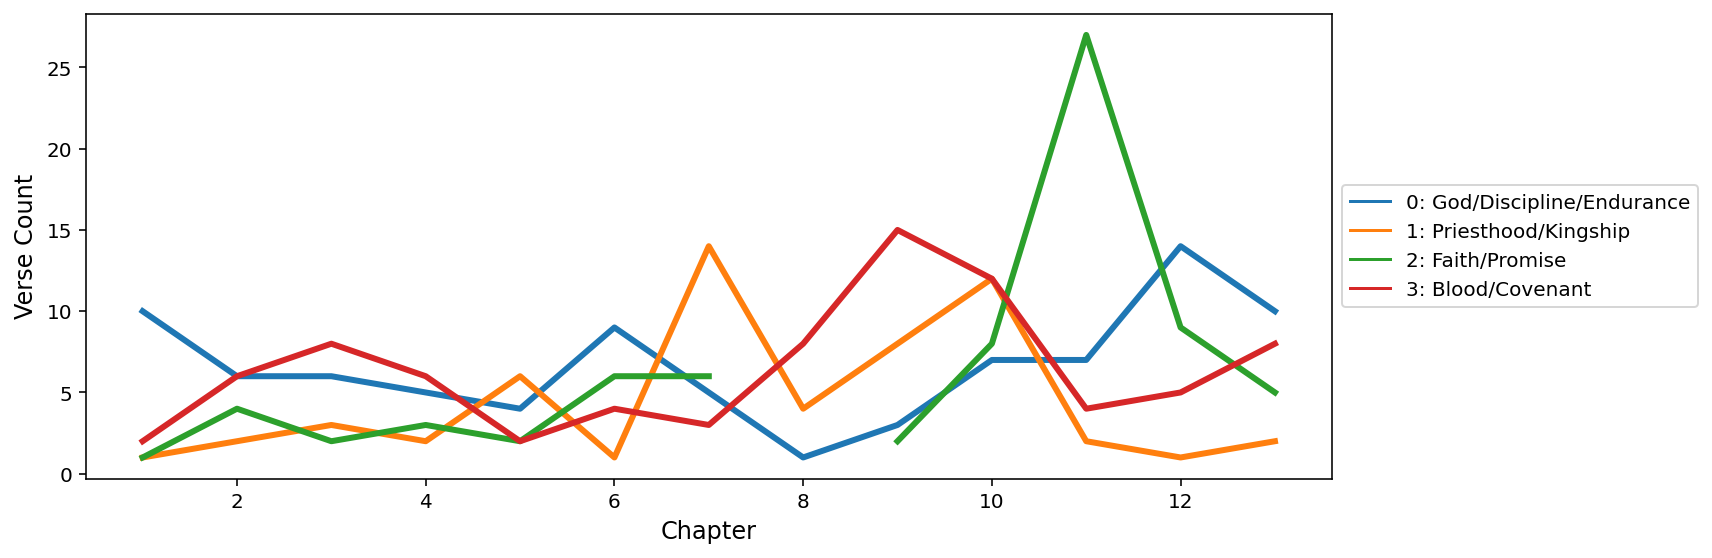

In [419]:
import seaborn as sns
%matplotlib inline
plt.figure(figsize = (12, 4),facecolor='white')

ax = sns.lineplot(data=df_wide,linewidth=3,dashes=False) #,palette=sns.color_palette('Spectral', n_colors=4)
#ax = sns.lineplot(data=df_wide,palette=sns.color_palette('coolwarm', n_colors=4),linewidth=3)

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.rc('axes',edgecolor='black')
#ax = plt.axes()
#ax.set_facecolor("orange")
# OR
ax.set(facecolor = "white")
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.rc('axes',edgecolor='black')
plt.ylabel("Verse Count",fontsize=12)
plt.xlabel("Chapter",fontsize=12)
plt.tight_layout()
# plt.savefig('line_topmod_chaps.svg')
plt.show()